In [26]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip as gz
import ast
import re
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

In [27]:
#con gzip abrimos el json y generamos un dataframe
with gz.open(r'C:\Users\Usuario\Desktop\HENRY\gonzalo1\steam_games.json.gz','rt', encoding='utf-8') as steam_games:

    df_steam_games = pd.read_json(steam_games, lines=True)

df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,user_id,steam_id,items,items_count
0,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,76561197970982479,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",277.0
1,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,js41637,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",888.0
2,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,evcentric,7.656120e+16,"[{'item_id': '1200', 'item_name': 'Red Orchest...",137.0
3,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,Riot-Punch,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",328.0
4,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,doctr,7.656120e+16,"[{'item_id': '300', 'item_name': 'Day of Defea...",541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,None,"Nikita ""Ghost_RUS""",None,NaN,None,NaN
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,None,Sacada,None,NaN,None,NaN
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,None,Laush Dmitriy Sergeevich,None,NaN,None,NaN
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,None,"xropi,stev3ns",None,NaN,None,NaN


In [28]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   reviews_url     32133 non-null  object 
 8   discount_price  225 non-null    float64
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  float64
 12  id              32133 non-null  float64
 13  metascore       2677 non-null   object 
 14  developer       28836 non-null  object 
 15  user_id         88310 non-null  object 
 16  steam_id        88310 non-null  float64
 17  items           88310 non-nul

In [29]:
precio_cero=['Free To Play', 'Free to Play','Free','Free Mod','Free HITMAN™ Holiday Pack','Play the Demo','Free to Use','Free Demo','Play WARMACHINE: Tactics Demo','Play for Free!','Free to Try','Free Movie']
precio_error=['Install Now','Install Theme','Third-party','Play Now'] 
precio_cor = ['Starting at $499.00','Starting at $449.00']

df_steam_games['price'] = df_steam_games['price'].replace(precio_cero, 0)
df_steam_games['price'] = df_steam_games['price'].replace(precio_error, np.nan)
df_steam_games['price'] = df_steam_games['price'].replace(precio_cor, 499.00)
df_steam_games['price'].astype(float)
df_steam_games.describe()

,discount_price,price,early_access,id,steam_id,items_count
count,225.000000,30752.000000,32135.000000,3.213300e+04,8.831000e+04,88310.000000
mean,11.930533,8.901038,0.060588,4.517574e+05,7.656120e+16,58.353629
std,17.492643,16.388163,0.238577,1.827140e+05,3.931726e+07,122.312095
min,0.490000,0.000000,0.000000,1.000000e+01,7.656120e+16,0.000000
25%,1.390000,2.990000,0.000000,3.292800e+05,7.656120e+16,3.000000
50%,4.190000,4.990000,0.000000,4.520600e+05,7.656120e+16,26.000000
75%,22.660000,9.990000,0.000000,5.934000e+05,7.656120e+16,73.000000
max,139.990000,995.000000,1.000000,2.028850e+06,7.656120e+16,7762.000000


elimino columnas que no voy a usar

In [30]:
steam_games = df_steam_games.drop(columns = ['items','user_id','steam_id','items_count'])
steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
0,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,None,None
1,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,None,None
2,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,None,None
3,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,None,None
4,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,None,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,None,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,None,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,None,"xropi,stev3ns"


In [31]:
steam_games.isnull().sum()

publisher          96362
genres             91593
app_name           88312
title              90360
url                88310
release_date       90377
tags               88473
reviews_url        88312
discount_price    120220
specs              88980
price              89693
early_access       88310
id                 88312
metascore         117768
developer          91609
dtype: int64

elimino las columnas con mayoria de faltantes

In [32]:
steam_games.drop(columns=['discount_price', 'metascore'], axis=1, inplace=True)

visualizo uno de los campos de estudio

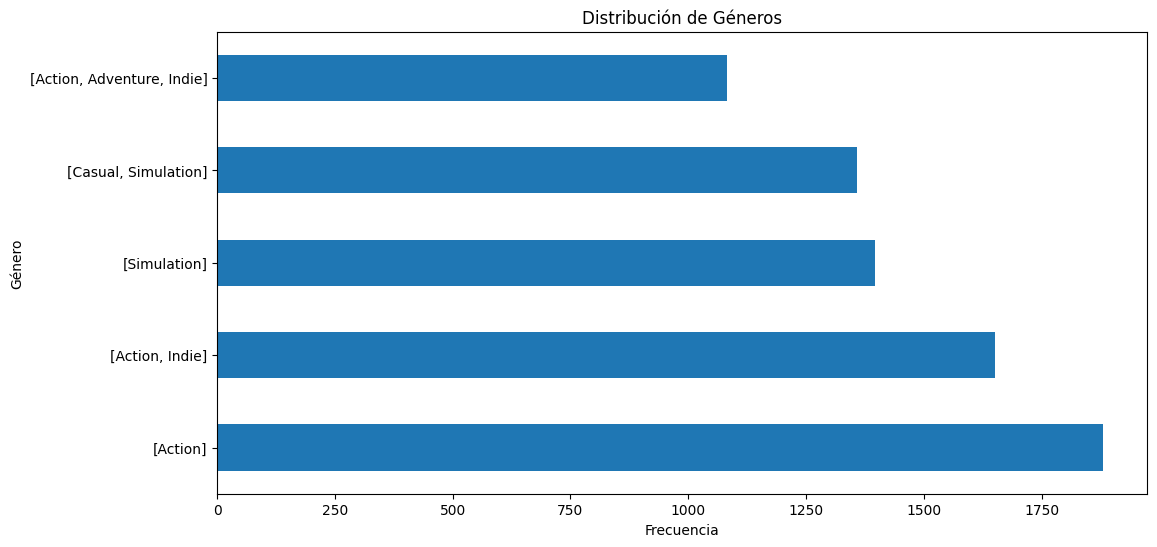

In [35]:
plt.figure(figsize=(12, 6))
steam_games['genres'].value_counts().head(5).plot(kind='barh')
plt.title('Distribución de Géneros')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()